<h1 style="text-align: center;">Analysis of Visible Range Spectrum to Determine Gibbs Adsorption</h1>


---
## Data Visualization and Storage in DataFrames

The purpose of this code is to analyze data obtained from the visible range spectrum from Mo/W samples after 1 day to determine how does the excess adsorption is affected by the pH of the system. Each measurement was carried out in an interval of **400-1100 nm**, and each file was saved with the following naming convention:

**type_day_month_concentration_CNT**.csv

Files without the **_car** extension are samples without carbon nanotubes (CNT). Each file was saved in a folder named after the type of the system and its **pH**. For example:

Folder: 95.2  
System: Mo/W = 95/5  
pH: 2

To start analyzing this data, we will create a class named **UVVisAnalyzer**, where we will open every file from every folder. The **_process_file** method will open each file, transform it into a pandas DataFrame, and pop out the **T%** column. 

The **_find_max_absorbance** method will find the peak between **400 nm** and **900 nm** that corresponds to the peak of our MoW system. We will store the absorbance of each sample at **742 nm** in a separate DataFrame. and each Dataframe will be stored in the **results_dict** for further analysis.

---

### Code

Import the necessary libraries 

In [45]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os

,Type,Concentration,Wavelenght(nm),Abs
0,No Carbon,0.02,742,0.1550
1,Carbon,0.02,742,0.0293
2,No Carbon,0.04,742,0.3641
3,Carbon,0.04,742,0.0862
4,No Carbon,0.05,742,1.1123
5,No Carbon,0.06,742,1.1099
6,Carbon,0.06,742,0.2624
7,No Carbon,0.08,742,1.7528
8,Carbon,0.08,742,0.5446
9,Carbon,0.10,742,0.6637


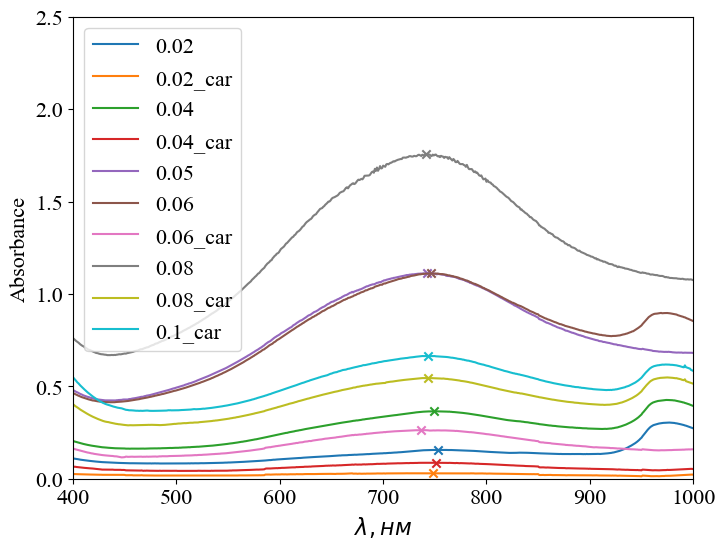

Processed folder: 95.3


,Type,Concentration,Wavelenght(nm),Abs
0,No Carbon,0.02,742,0.3131
1,Carbon,0.02,742,0.1052
2,No Carbon,0.04,742,0.8367
3,Carbon,0.04,742,0.2380
4,No Carbon,0.06,742,1.2643
5,Carbon,0.06,742,0.3325
6,No Carbon,0.08,742,1.6751
7,Carbon,0.08,742,0.4807
8,Carbon,0.10,742,0.4807


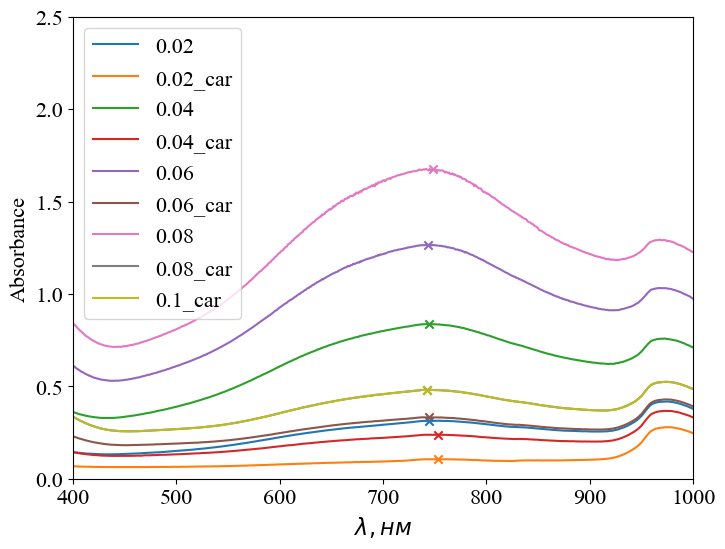

Processed folder: 95.2


,Type,Concentration,Wavelenght(nm),Abs
0,No Carbon,0.02,742,-0.0035
1,Carbon,0.02,742,-0.1112
2,No Carbon,0.04,742,0.1924
3,Carbon,0.04,742,-0.0642
4,No Carbon,0.06,742,0.4182
5,Carbon,0.06,742,-0.0256
6,No Carbon,0.08,742,0.5841
7,Carbon,0.08,742,0.0519
8,No Carbon,0.10,742,0.8778
9,Carbon,0.10,742,0.1498


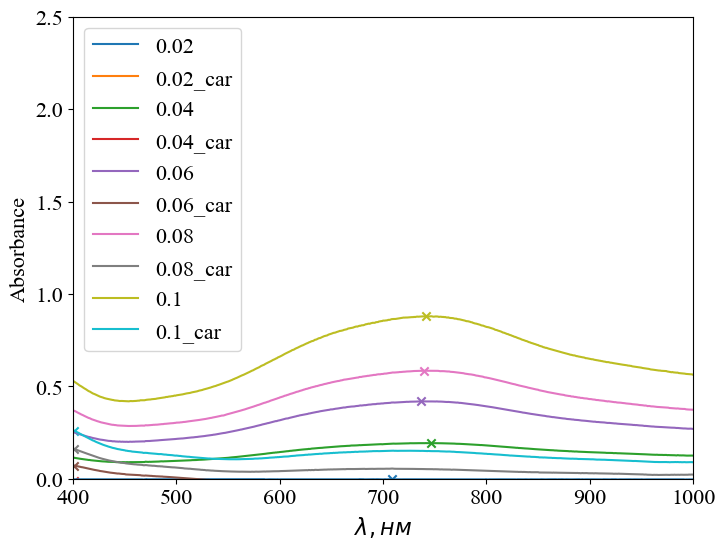

Processed folder: 95.05


In [46]:
class UVVisAnalyzer:
    def __init__(self, path):
        self.path = path
        self.dir_list = os.listdir(path)                          #os.listdir()	Returns a list of the names of the entries in a directory
        self._configure_plot_settings()

    def _configure_plot_settings(self):                                           #Set up consistent plot settings
        plt.rcParams["font.family"] = "Times New Roman"
        matplotlib.rcParams.update({
            'font.size': 16,
            'figure.figsize': (8, 6)
        })

    def _process_file(self, filename):                                            #Read and preprocess a UV-Vis data file.
        filepath = os.path.join(self.path, filename)
        df = pd.read_csv(filepath, skiprows=10)
        return df.drop(' T%', axis=1)

    def _find_max_absorbance(self, df):                                          #Identify and plot maximum absorbance between 400-900 nm.
        filtered_df = df[(df['WL(nm)'] > 400) & (df['WL(nm)'] < 900)]
        max_row = filtered_df.loc[filtered_df[' Abs'].idxmax()]
        #print(f"Max absorbance row:\n{max_row}")
        plt.scatter(max_row['WL(nm)'], max_row[' Abs'], marker='x')

    def _setup_plot_axes(self):                                                  #Configure common plot axes and labels.
        plt.xlabel(r'$\lambda, нм$')
        plt.ylabel('Absorbance')
        plt.legend()
        plt.xlim(400, 1000)
        plt.ylim(0, 2.5)

    def analyze_and_visualize(self, save_name='UV_VIS.png'):                     #Main workflow to process files and generate plots.
        plt.figure()

        data = {'Type':[],
                    'Concentration':[],
                    'Wavelenght(nm)':[],
                    'Abs':[]}
        
        for filename in self.dir_list:
            df = self._process_file(filename)
            sample_id = filename[9:-4]                                           # Extract identifier from filename
            base = filename.split('.csv')[0]
            parts = base.split('_')
            concentration = None                                             # Find last numeric value (concentration)
            for part in reversed(parts):
                try:
                    concentration = float(part)
                    break
                except ValueError:
                    continue
            # Determine type Carbon if it corresponds to systems with Carbon Nanotubes (CNT)
            file_type = 'Carbon' if '_car' in base else 'No Carbon'

            #Save everything in a df(data)
            data['Type'].append(file_type)
            data['Concentration'].append(concentration)
            data['Wavelenght(nm)'].append(742)
            data['Abs'].append(df[df['WL(nm)'] == 742][' Abs'].values[0])

            #plot
            plt.plot(df['WL(nm)'], df[' Abs'], label=sample_id)
            self._find_max_absorbance(df)
 
        # Final plot adjustments
        df_experiment = pd.DataFrame(data)
        display(df_experiment)
        self._setup_plot_axes()
        plt.savefig(save_name, dpi=300)
        plt.show()
        
        return df_experiment


if __name__ == "__main__":
    folders = ['95.3', '95.2', '95.05']  # Name of the folders with the experimental data 
    results_dict = {}                    # Dictionary to store results
                    
    for folder in folders:
        analyzer = UVVisAnalyzer(folder)   # Create analyzer instance
        result_df = analyzer.analyze_and_visualize(save_name=f'{folder}UV_VIS.png'  )
    
        # Store results in dictionary
        results_dict[folder] = result_df
        print(f"Processed folder: {folder}")

## Data Cleaning
The next step is to clean the data. Since we are working with very diluted systems, the optical absorbance of the samples at low concentrations are very likely to be interpreted as an error, or in this case **negative abs** values, for that we well be using **only positive abs** values.

### Sample Data: Mo/W=95/5 pH=0.5 (24h)
| Index| Type | Concentration | Wavelenght(nm) | Abs | Status       |
|-------|-----|-----------|---------|-------------|--------------|
| 2|No Carbon      | 0.04      | 742   | 0.1924       | ✅ keep  |
| 3|Carbon      | 0.04      | 742  | -0.0642         | ❌ remove  |

**System Mo/W=95/5 pH= 0.5 after 24 hours:**

<img src="samples.jpg" width="300" height="300"/>

In [47]:
for key in results_dict:
    results_dict[key] = results_dict[key][results_dict[key]['Abs'] > 0]
results_dict['95.3'] = results_dict['95.3'].drop(index= 4)
results_dict

{'95.3':         Type  Concentration  Wavelenght(nm)     Abs
 0  No Carbon           0.02             742  0.1550
 1     Carbon           0.02             742  0.0293
 2  No Carbon           0.04             742  0.3641
 3     Carbon           0.04             742  0.0862
 5  No Carbon           0.06             742  1.1099
 6     Carbon           0.06             742  0.2624
 7  No Carbon           0.08             742  1.7528
 8     Carbon           0.08             742  0.5446
 9     Carbon           0.10             742  0.6637,
 '95.2':         Type  Concentration  Wavelenght(nm)     Abs
 0  No Carbon           0.02             742  0.3131
 1     Carbon           0.02             742  0.1052
 2  No Carbon           0.04             742  0.8367
 3     Carbon           0.04             742  0.2380
 4  No Carbon           0.06             742  1.2643
 5     Carbon           0.06             742  0.3325
 6  No Carbon           0.08             742  1.6751
 7     Carbon           0.08 

# Calibration Method and Gibbs Adsorption
In order to calculate the amount of mass adsorbed after 24 hours, we will create a calibration line using the optical absorbance with  known concentration of samples without CNT. The x axis will be expressed as concentration and the Y axis will be the optical absorbance. Once we interpolate the data we will use the calibration line to calculate the concentration of the MoW in the samplles with CNT after the adsoption.

<img src="calibration method.jpg" width="800" height="800"/>

For that we will use the **class Adsorption Analyzer**, the **create_calibration** method will interpolate the points of no CNT samples using **np.polyfit**, then the coefficients will be stored and used in the method **calculate_adsorbed_mass** using this formula:
**Linear Calibration Model**  
For absorbance-concentration relationship:  
$$y = mx + b$$  
Where:  
- \( y \): Optical absorbance  
- \( m \): First coefficient (slope) from linear interpolation  
- \( b \): Second coefficient (intercept) from linear interpolation  
- \( x \): Unknown concentration  

**Concentration Calculation**  
Rearranged form for concentration determination:  
$$
x = \frac{y - b}{m}
$$

The Concentration will be stored in **Gibbs_adsorp** dictionaary as **conc_aft**. In **conc_bef** will be stored the concentration of Mo/W befor the adsortion and **Abs after** will store the optical absorbance value that we used to calculate the concentration using the formula shown before.
This process will be reapeated for all the 3 systems, the df will be displayed with the equation of the calibration line, **results_gibbs_dict** will stored the df of **Gibbs_adsorp** dictionary, and **calibration_lines** will store the interpolation coefficients for each system

**Gibbs Adsorption Formula**  
$$
\Gamma = \frac{(C_0 - C)}{m \cdot 100\%} \cdot p \cdot V \quad \left[ \frac{\mathrm{g\:MoW}}{\mathrm{g\:CNT}} \right]
$$

Where:  
- $\Gamma$: Gibbs adsorption (excess adsorption)  
- $C_0$: Initial concentration of molybdenum blue (before adsorption) [wt.%]  
- $C$: Equilibrium concentration of molybdenum blue (after adsorption) [wt.%]  
- $m$: Mass of adsorbent [g]  
- $p$: Density of molybdenum blue [g/cm³]  
- $V$: Volume of molybdenum blue solution [cm³]

The Gibbs adsorption (excess adsorption) is calculated in the **calculate_adsorbed_mass** method and stored as in the column **Gibbs_A**

Processed system: 95.3
Interpolation equation:27.696x -0.539


,Conc_bef,Conc_aft,Abs After,Gibbs_A
0,0.02,0.020532,0.0293,-0.001773
1,0.04,0.022586,0.0862,0.058046
2,0.06,0.028948,0.2624,0.103506
3,0.08,0.039137,0.5446,0.136209
4,0.10,0.043438,0.6637,0.188541


Processed system: 95.2
Interpolation equation:22.568x -0.106


,Conc_bef,Conc_aft,Abs After,Gibbs_A
0,0.02,0.009363,0.1052,0.035457
1,0.04,0.015247,0.2380,0.082509
2,0.06,0.019435,0.3325,0.135218
3,0.08,0.026001,0.4807,0.179995
4,0.10,0.026001,0.4807,0.246662


Processed system: 95.05
Interpolation equation:11.111x -0.260


,Conc_bef,Conc_aft,Abs After,Gibbs_A
0,0.08,0.028037,0.0519,0.173209
1,0.10,0.036849,0.1498,0.210504


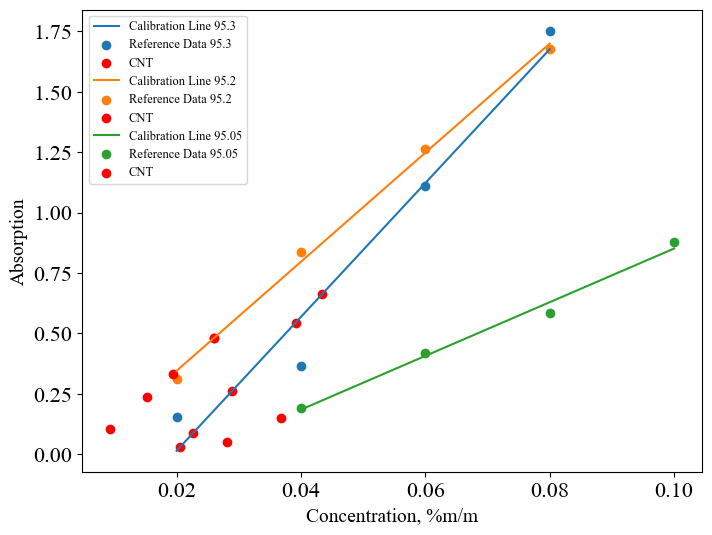

In [48]:
class AdsorptionAnalyzer:
    def __init__(self, dataframe, name):
        self.df = dataframe
        self.name = name
        self.df_car = self.df[self.df['Type'] == 'Carbon'].copy()
        self.df_nocar = self.df[self.df['Type'] == 'No Carbon'].copy()
        self._configure_plot_settings()
        self.coeffs = None

    def _configure_plot_settings(self):
        plt.rcParams["font.family"] = "Times New Roman"
        matplotlib.rcParams.update({
            'font.size': 16,
            'figure.figsize': (8, 6)
        })
    #Create the calibration line from non-carbon data
    def create_calibration(self, degree=1):                      
        x = self.df_nocar['Concentration']
        y = self.df_nocar['Abs']
        self.coeffs = np.polyfit(x, y, degree)
        return self.coeffs
    #Calculate adsorbed mass using calibration curve
    def calculate_adsorbed_mass(self):                           
        if self.coeffs is None:
            raise ValueError("Run create_calibration() first")
            
        Gibbs_adsorp = {
            'Conc_bef': [],
            'Conc_aft': [],
            'Abs After': [],
        }

        for _, row in self.df_car.iterrows():
            v = row['Abs']
            x = (v - self.coeffs[1])/self.coeffs[0]
            
            Gibbs_adsorp['Abs After'].append(v)
            Gibbs_adsorp['Conc_aft'].append(x)
            Gibbs_adsorp['Conc_bef'].append(row['Concentration'])
            
        Gibbs_adsorp = pd.DataFrame(Gibbs_adsorp)
        Gibbs_adsorp['Gibbs_A']= (Gibbs_adsorp['Conc_bef'] - Gibbs_adsorp['Conc_aft'])*1*10/(100*0.03)#
        return pd.DataFrame(Gibbs_adsorp)
    # Plot calibration line using the coefficients from create_calibration
    def plot_results(self, save_name='adsorption_plot.png'):      
        x_fit = np.linspace(
            self.df_nocar['Concentration'].min(),
            self.df_nocar['Concentration'].max(),
            100
        )
        y_fit = np.polyval(self.coeffs, x_fit)
        plt.plot(x_fit, y_fit, label='Calibration Line '+ self.name)
        plt.scatter(self.df_nocar['Concentration'], self.df_nocar['Abs'], 
                 label='Reference Data '+ self.name)

        # Plot calculated points
        results = self.calculate_adsorbed_mass()
        plt.scatter(results['Conc_aft'], results['Abs After'],
                  c='r', marker='o', label='CNT')

        plt.xlabel('Concentration, %m/m', fontsize=14)
        plt.ylabel('Absorption', fontsize=14)
        plt.legend(loc='upper left', fontsize="9")
        plt.savefig(save_name, dpi=300)

if __name__ == "__main__":
    results_gibbs_dict = {}
    calibration_lines = {}
    for keys,values in results_dict.items():
        analyzer = AdsorptionAnalyzer(values, keys)
        equations = analyzer.create_calibration(degree=1)
        calibration_lines[keys] = equations
        results_df = analyzer.calculate_adsorbed_mass()
        print(f"Processed system: {keys}\nInterpolation equation:{equations[0]:.3f}x {equations[1]:.3f}")
        display(results_df)
        analyzer.plot_results(save_name=f'{keys}adsorption.png')
        results_gibbs_dict[keys] = results_df

In [49]:
calibration_lines

{'95.3': array([27.696  , -0.53935]),
 '95.2': array([22.568 , -0.1061]),
 '95.05': array([11.1105 , -0.25961])}

In [50]:
results_gibbs_dict

{'95.3':    Conc_bef  Conc_aft  Abs After   Gibbs_A
 0      0.02  0.020532     0.0293 -0.001773
 1      0.04  0.022586     0.0862  0.058046
 2      0.06  0.028948     0.2624  0.103506
 3      0.08  0.039137     0.5446  0.136209
 4      0.10  0.043438     0.6637  0.188541,
 '95.2':    Conc_bef  Conc_aft  Abs After   Gibbs_A
 0      0.02  0.009363     0.1052  0.035457
 1      0.04  0.015247     0.2380  0.082509
 2      0.06  0.019435     0.3325  0.135218
 3      0.08  0.026001     0.4807  0.179995
 4      0.10  0.026001     0.4807  0.246662,
 '95.05':    Conc_bef  Conc_aft  Abs After   Gibbs_A
 0      0.08  0.028037     0.0519  0.173209
 1      0.10  0.036849     0.1498  0.210504}

---
## Data Cleaning & Anomaly Handling
In this case I decided to filter the negative values for Gibbs Adsorption and manually removed the 4th row of the df 95.2 (system Mo/W=95/5 pH=2) since it may correspond to a mistake during measurements.


 **Original suspect data:**
| Index | Conc_bef | Conc_aft | Abs After | Gibbs_A |
|-------|----------|---------------|------------|-----------|
| 3     | 0.08     | 0.026001      | 0.4807     | 0.179995  |
| 4     | 0.10     | 0.026001      | 0.4807     | 0.246662  |

**Anomaly detection:**
- Identical Abs_after values (`0.4807`) for different concentrations (`0.08%` vs `0.10%`)

---

In [51]:
for key in results_gibbs_dict:
    results_gibbs_dict[key] = results_gibbs_dict[key][results_gibbs_dict[key]['Gibbs_A'] > 0]
results_gibbs_dict['95.2'] = results_gibbs_dict['95.2'].drop(index= 4)

results_gibbs_dict

{'95.3':    Conc_bef  Conc_aft  Abs After   Gibbs_A
 1      0.04  0.022586     0.0862  0.058046
 2      0.06  0.028948     0.2624  0.103506
 3      0.08  0.039137     0.5446  0.136209
 4      0.10  0.043438     0.6637  0.188541,
 '95.2':    Conc_bef  Conc_aft  Abs After   Gibbs_A
 0      0.02  0.009363     0.1052  0.035457
 1      0.04  0.015247     0.2380  0.082509
 2      0.06  0.019435     0.3325  0.135218
 3      0.08  0.026001     0.4807  0.179995,
 '95.05':    Conc_bef  Conc_aft  Abs After   Gibbs_A
 0      0.08  0.028037     0.0519  0.173209
 1      0.10  0.036849     0.1498  0.210504}

---
## Langmuir Isotherm Analysis

### Key Assumptions  
1. **Monolayer Adsorption**: Mo/W particles form a single molecular layer on CNT surfaces  
2. **Homogeneous Surface**: Identical adsorption sites across carbon nanotubes  
3. **Dilute System Approximation**:  
   $$ \Gamma \approx A \quad \text{(Excess adsorption ≈ Absolute adsorption)} $$  
   Valid when $ C_e \rightarrow 0 $ in diluted samples  

### Langmuir Isotherm Equation  
$$ \frac{1}{A_e} = \left( \frac{1}{A_{max}K_L} \right) \frac{1}{C_e} + \frac{1}{A_{max}} $$  

**Variables**:  
- $ A_e $: Equilibrium adsorption capacity $ [\mathrm{g\,MoW/g\,CNT}] $  
- $ A_{max} $: Maximum adsorption capacity $ [\mathrm{g\,MoW/g\,CNT}] $  
- $ K_L $: Langmuir constant $ [\mathrm{g\,solution/g\,MoW}] $  
- $ C_e $: Equilibrium concentration $ [\mathrm{g\,MoW/g\,solution}] $

By finding the coefficients of the interpolation for the inverse adsorption and inverse concentration, we can calculate the maximum adsorption capacity. For this purpose, we will use the **class AdsorptionAnalyzer** and assign specific tags as 'regular' or 'inversed' to divide the graphs into two categories. In the inverse plot, we will carry out the interpolation for each system, and each coefficient will be stored in the **calibration_inv_lines** dictionary.

---

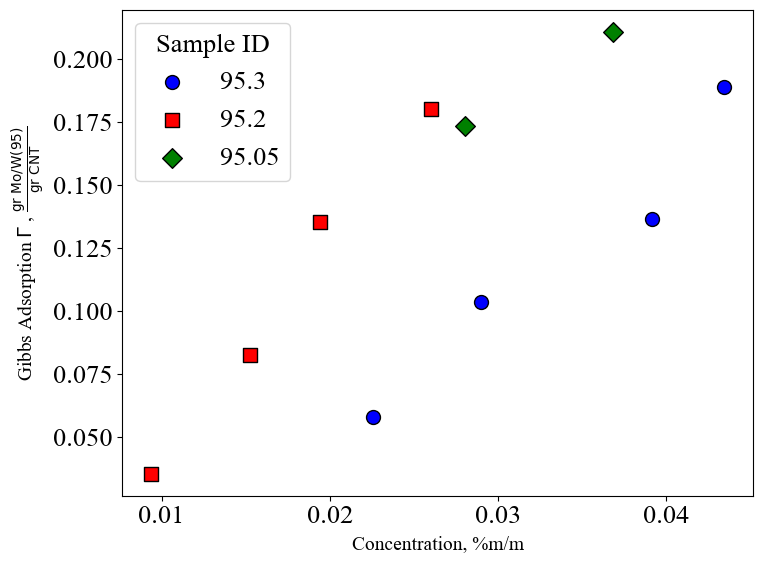

Interpolation equation for 95.3 : 0.527x -6.892
Interpolation equation for 95.2 : 0.345x -9.277
Interpolation equation for 95.05 : 0.120x 1.496


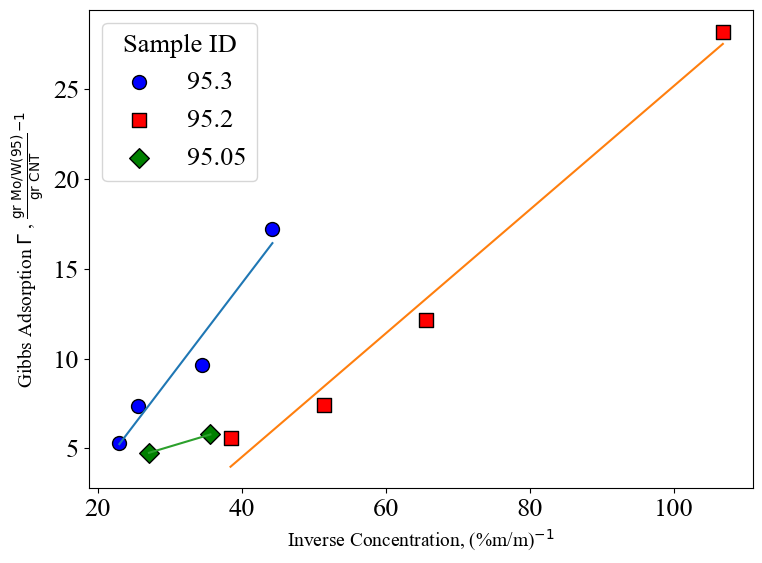

In [52]:
class Isotherm:
    def __init__(self):
        self._configure_plot_settings()
        self.markers = {'95.3': 'o', '95.2': 's', '95.05': 'D'}
        self.colors = {'95.3': 'blue', '95.2': 'red', '95.05': 'green'}
        self.coeffs = None

    def _configure_plot_settings(self):
        """Set up consistent plot settings."""
        plt.rcParams["font.family"] = "Times New Roman"
        matplotlib.rcParams.update({
            'font.size': 19,
            'figure.figsize': (8, 6)
        })
    
    def plot_combined_gibbs(self, data_dict, plot_type='regular', savename="combined_plot.png"):
        """Plot combined Gibbs data (regular or inverse)"""
        plt.figure()
        
        for key, df in data_dict.items():
            if plot_type == 'regular':
                x = df['Conc_aft']
                y = df['Gibbs_A']
                xlabel = 'Concentration, %m/m'
                ylabel = r'Gibbs Adsorption $\Gamma$ , $\frac{\text{gr Mo/W(95)}}{\text{gr CNT}}$'
            elif plot_type == 'inverse':
                x = 1/df['Conc_aft']
                y = 1/df['Gibbs_A']
                xlabel = 'Inverse Concentration, (%m/m)$^{-1}$'
                ylabel = r'Gibbs Adsorption $\Gamma$ , $\frac{\text{gr Mo/W(95)}}{\text{gr CNT}}^{-1}$'
                self.coeffs = np.polyfit(x, y, 1)
                x_fit = np.linspace(x.min(),
                                    x.max(),
                                    100)
                y_fit = np.polyval(self.coeffs, x_fit)
                plt.plot(x_fit, y_fit)
                print(f"Interpolation equation for {key} : {self.coeffs[0]:.3f}x {self.coeffs[1]:.3f}")
                calibration_inv_lines[key] = self.coeffs
                

            plt.scatter(
                x, y,
                marker=self.markers[key],
                color=self.colors[key],
                label=f'{key}',
                edgecolor='black',
                s=100
            )

        plt.xlabel(xlabel, fontsize=14)
        plt.ylabel(ylabel, fontsize=14)
        plt.legend(title='Sample ID')
        
        
        
        
        plt.tight_layout()
        plt.savefig(savename, dpi=300, bbox_inches='tight')
        plt.show()

if __name__ == "__main__":
    calibration_inv_lines = {}
    analyzer = Isotherm()  

    analyzer.plot_combined_gibbs(results_gibbs_dict, 
                               plot_type='regular',
                               savename='combined_gibbs.png')
    
    analyzer.plot_combined_gibbs(results_gibbs_dict,
                               plot_type='inverse',
                               savename='combined_inv_gibbs.png')

---
## Data Storage
Finally, we will save all processed DataFrames into an Excel file. This file will contain three sheets:

- The first sheet will store **results_df** generated by the UVVisAnalyzer class.
- The second sheet will store the **interpolation coefficients** calculated by the AdsorptionAnalyzer and Isotherm classes.
- The third sheet will store **results_gibbs_dict**, which contains the Gibbs adsorption calculations from the AdsorptionAnalyzer class.

In [53]:
# Create a Pandas ExcelWriter object
with pd.ExcelWriter("all_data.xlsx", engine="openpyxl") as writer:
    
    # 1. Process results_dict into the first sheet
    results_dfs = []
    for key, df in results_dict.items():
        df_copy = df.copy()
        df_copy["Category"] = key  # Add source identifier
        results_dfs.append(df_copy)
    pd.concat(results_dfs).to_excel(writer, sheet_name="Results", index=False)
    
    # 2. Process calibration_lines into the second sheet
    # Process CALIBRATION data into the same sheet with separation
    calibration_data = []
    calibration_inv_data = []
    
    # Create DataFrames for both calibration tables
    for key in calibration_lines.keys():
        # Original calibration lines
        calibration_data.append({
            "Category": key,
            "Slope": calibration_lines[key][0],
            "Intercept": calibration_lines[key][1]
        })
        
        # Inverse calibration lines
        calibration_inv_data.append({
            "Category": key,
            "Slope (Inverse)": calibration_inv_lines[key][0],
            "Intercept (Inverse)": calibration_inv_lines[key][1]
        })

    # Convert to DataFrames
    df_calib = pd.DataFrame(calibration_data)
    df_calib_inv = pd.DataFrame(calibration_inv_data)

    # Write to Excel with separation
    start_row = 0
    df_calib.to_excel(writer, sheet_name="Calibration", startrow=start_row, index=False)
    
    # Add inverse table 2 rows below the first table
    start_row = len(df_calib) + 2  # 2 blank rows between tables
    df_calib_inv.to_excel(
        writer, 
        sheet_name="Calibration", 
        startrow=start_row, 
        index=False, 
        header=True  # Keep headers for the second table
    )
    # 3. Process results_gibbs_dict into the third sheet
    gibbs_dfs = []
    for key, df in results_gibbs_dict.items():
        df_copy = df.copy()
        df_copy["Category"] = key  # Add source identifier
        gibbs_dfs.append(df_copy)
    pd.concat(gibbs_dfs).to_excel(writer, sheet_name="Gibbs", index=False)

---

### Contact Information  
For inquiries regarding this code or analysis, please contact:  

**Email:** [red.neuronalec@gmail.com](mailto:red.neuronalec@gmail.com)  
**Name:** Minta B.  

---
